In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

import warnings
warnings.filterwarnings('ignore')

    과제 
    A B 그룹의 Box Plot을 그리고 이상치를 구하세요

- data load

<AxesSubplot:xlabel='species', ylabel='length'>

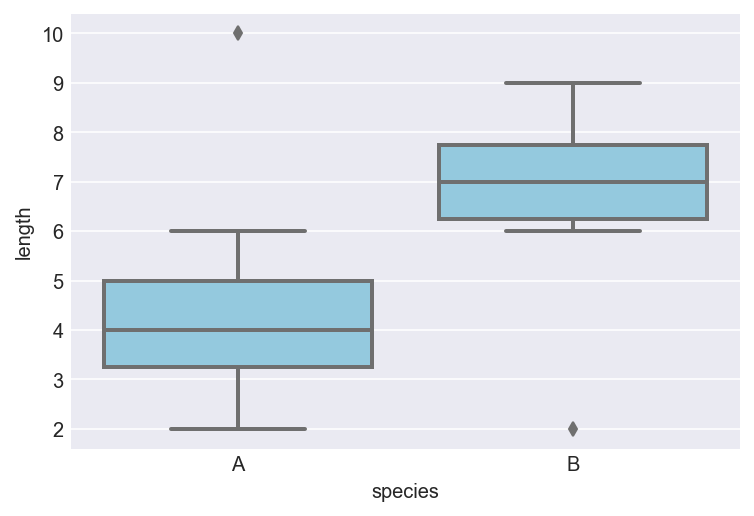

In [2]:
fish_multi = pd.read_csv('../Data/4_fm2.csv')
fish_multi.iloc[5,1] = 10
# #test
# fish_multi.iloc[3,1] = 30
fish_multi.iloc[10,1] = 2
fish_multi.groupby('species').describe()
sns.boxplot(x='species',y='length',data=fish_multi,color='skyblue')

In [3]:
#풀어쓰기
test1 = fish_multi.groupby('species')
A =test1.get_group('A')
B =test1.get_group('B')

a_Q1 = A.length.describe()['25%']
a_Q3 = A.length.describe()['75%']
b_Q1 = B.length.describe()['25%']
b_Q3 = B.length.describe()['75%']

a_IQR = a_Q3 - a_Q1
b_IQR = b_Q3 - b_Q1

A_ol=A[(A['length']<(a_Q1 - 1.5*a_IQR)) | (A['length'] > (a_Q3 + 1.5*a_IQR))]
B_ol=B[(B['length']<(b_Q1 - 1.5*b_IQR)) | (B['length'] > (b_Q3 + 1.5*b_IQR))]

Fish_outlier = A_ol.merge(B_ol,how='outer')
Fish_outlier

,species,length
0,A,10
1,B,2


In [4]:
#사용자 함수 생성 by 아름님
def find_outlier(x):
    Q1,Q3 = np.percentile(x,[25,75])
    IQR = Q3 - Q1
    outlier = x.loc[(x < (Q1 - 1.5*IQR)) | (x > (Q3 + 1.5 * IQR))].tolist()
    return outlier

fish_multi.groupby('species').agg(find_outlier)

,length
species,
A,[10]
B,[2]


    과제 - 추가 decoration / 막대그래프


range(0, 10)
[7 5 5 8 2 8 9 6 6 7]


Text(0.5, 0, 'x')

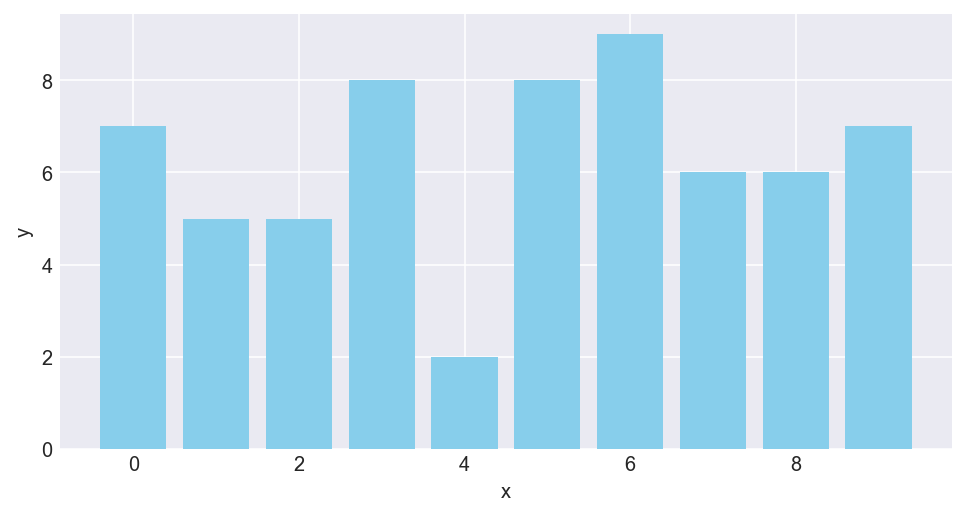

In [5]:
# 문제 값
y = np.random.randint(2,10,size=10)
x = range(len(y))
print(x)
print(y)
plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.8,color='skyblue')
plt.ylabel('y')
plt.xlabel('x')


No handles with labels found to put in legend.


range(0, 10)
[2 9 3 5 4 7 8 6 8 6]


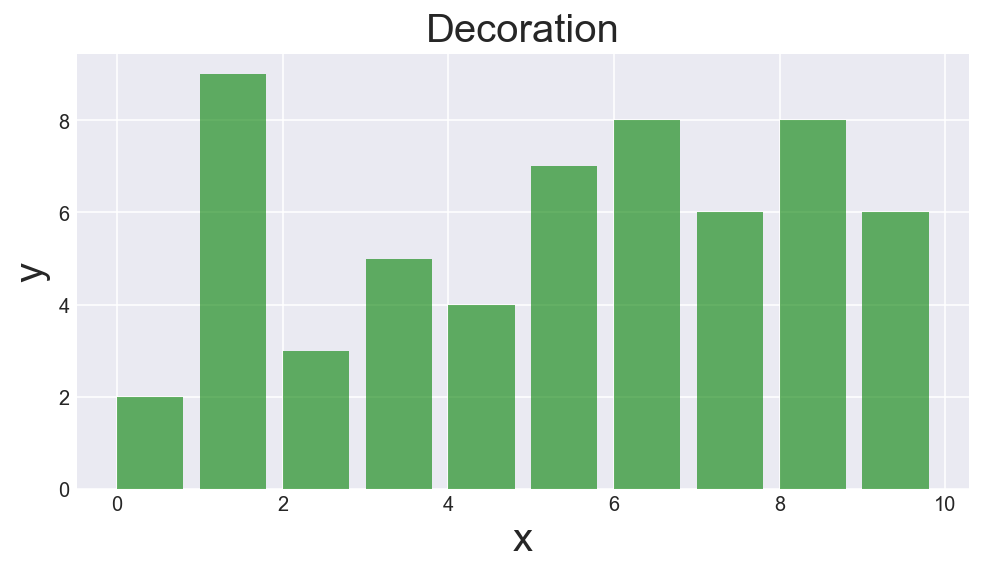

In [6]:
# 결과값
y = np.random.randint(2,10,size=10)
x = range(len(y))
print(x)
print(y)
plt.figure(figsize=(8,4))
# 1. 폰트 크기 변경
plt.ylabel('y',fontsize=20) 
plt.xlabel('x',fontsize=20)
# 2. Title생성
plt.title('Decoration',fontsize=20)
plt.bar(x,y,width=0.8,align='edge',color='Green',alpha=0.6) #한쪽 끝으로 정렬
plt.legend()
# 3. font
# plt.xticks(index,label,fontsize=15)

    과제
    Q. hist, line, bar, scatter 그래프 4개를 서브플록으로 출력하세요

In [7]:
data =pd.read_excel('../Data/한국관광수지_210727111801.xls')

In [8]:
data

,연도,계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,"2017년(1,000 US$)",13263900,1176700,1272600,1125600,988400,988100,1008700,956000,1375500,1216400,1045000,1081200,1029700
1,"2018년(1,000 US$)",18461800,1241100,1276900,1590700,1713400,1615300,1669600,1487400,1562000,1521900,1850400,1401900,1531200
2,"2019년(1,000 US$)",20744900,1446000,1450000,2062200,2014000,1850700,1519300,1695700,1767600,1624700,1745300,1733600,1835800
3,"2020년(1,000 US$)",10436200,1459100,1054200,889300,631600,663900,681000,815100,884400,862200,851800,856900,786700


과제
Q. 시각화 탐색을 통하여 df의 각 칼럼에 대한 인사이틀 기술하세요(5개 이상)

    - 의미없는 변수 제거
    - 변수 분포
    - 종속변수인 survived와 독립변수간 상관관계
    - 독립변수간 상관관계
    - 분석에 의미있는 파생변수 도출

In [9]:
import seaborn as sns
df = sns.load_dataset('titanic')
t_clean = df.copy()
t_clean.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


변수 탐색
        
        변수 의미 / 정리

In [10]:

t_clean['alive'] = t_clean['alive'].replace('yes',1).replace('no',0)
t_clean['alive'].equals(t_clean['survived'])
t_clean = t_clean.drop('alive',axis=1)

t_clean['class'] = t_clean['class'].replace({'First':1,'Second':2,'Third':3})
t_clean['class'].equals(t_clean['pclass'])
t_clean = t_clean.drop('class',axis=1)

t_clean['family'] = t_clean['sibsp'] + t_clean['parch'] + 1
t_clean = t_clean.drop('alone',axis=1)

t_clean['embarked'] = t_clean['embarked'].fillna('S')
t_clean['embark_town'] = t_clean['embark_town'].fillna('Southampton')
t_clean['Title'] = [x[0] for x in t_clean['embark_town']]
t_clean['embarked'].equals(t_clean['Title'])
t_clean['embarked'] = t_clean['embarked'].replace({'S':1,'C':2,'Q':3})
t_clean = t_clean.drop(['Title','embark_town'],axis=1)

t_clean = t_clean.drop('deck',axis = 1)

t_clean['adult_male'] = t_clean['adult_male'].replace({True:1,False:0})


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features = ['sex']
for feature in features:
    t_clean['sex_E'] = le.fit_transform(t_clean['sex'])
t_clean = t_clean.drop('sex',axis=1)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features = ['who']
for feature in features:
    t_clean['who_E'] = le.fit_transform(t_clean['who'])
t_clean = t_clean.drop('who',axis=1)

In [11]:
t_clean.head(1)

,survived,pclass,age,sibsp,parch,fare,embarked,adult_male,family,sex_E,who_E
0,0,3,22.0,1,0,7.25,1,1,2,1,1


시각화 탐색
        
        변수분포

시각화 탐색
        
        종속변수인 survived와 독립변수간 상관관계

시각화 탐색
        
        독립변수간 상관관계

시각화 탐색
        
        분석에 의미있는 파생변수 도출
